In [56]:
# Import basic libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

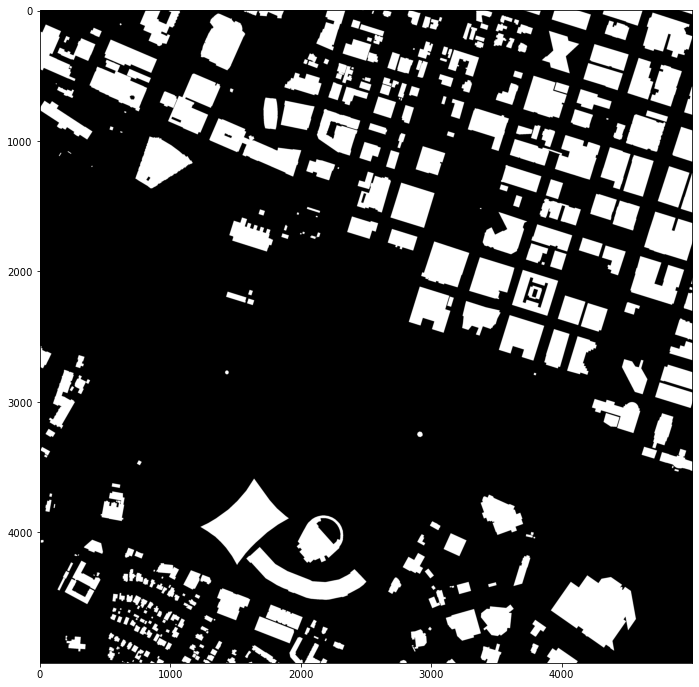

In [65]:
image = cv2.imread('D:\\Study\\DataScience\\GeoAI\\BuildingFootprints\\ImageDataset\\train\\gt\\austin16.tif')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(22,12))
plt.imshow(image)

In [5]:
import fiona
import rasterio.features

schema = {"geometry": "Polygon", "properties": {"value": "int"}}

In [69]:
# Read RGB Image
raster_image = 'D:\\Study\\DataScience\\GeoAI\\BuildingFootprints\\ImageDataset\\train\\images\\austin3.tif'

# Create masked image
grey_image = cv2.imread('D:\\Study\\DataScience\\GeoAI\\BuildingFootprints\\ImageDataset\\train\\gt\\austin3.tif')
grey_image = cv2.cvtColor(grey_image, cv2.COLOR_BGR2GRAY) 
ret, maksed_image = cv2.threshold(grey_image, 10, 255, cv2.THRESH_BINARY)

# Convert masked image into boolean array ( True when value = 255 and False when values = 0)
masked_boolean = (maksed_image == 255)

In [64]:
# Read image with RasterIO and export shapes as ESRI shapefile
with rasterio.open(raster_image) as raster:
    img = raster.read()
    
    # Boolean masked array
    mask = masked_boolean
    
    # Convert to uint8 for rasterio.features.shapes
    mask = mask.astype('uint8')
    shapes = rasterio.features.shapes(mask, transform = raster.transform)
    
    # Select the records from shapes where the value is 1 or where the mask is True
    records = [{"geometry": geometry, "properties": {"value": value}}
               for (geometry, value) in shapes if value == 1]
    
    # Export records as polygon shapefile
    with fiona.open('D:\\Study\\DataScience\\GeoAI\\BuildingFootprints\\BuildingShapefiles\\austin_3_buildings.shp', "w", "ESRI Shapefile",
                    crs=raster.crs.data, schema=schema) as out_file:
        out_file.writerecords(records)